<a href="https://colab.research.google.com/github/Calista-F/CCSN-gravitational-wave-denoising/blob/main/Dimmelmeier_CCSN_Denoising_signal_60_5_(s20a1o05).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt
import pandas as pd

from math import log10, sqrt
import cv2
import numpy as np

In [ ]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, max_error
import math

def get_rmse(y_target, y_computed):
  RMSE = mean_squared_error(y_target, y_computed, squared=False)
  return RMSE

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Load worksheet
repo = gc.open_by_url('https://docs.google.com/spreadsheets/d/1rLm5XU_lHHkqv223dtoYpKe1ZWpqhCLpnFJBl2A1JAI/edit#gid=0')
worksheet = repo.worksheet('CCSN_signal60_dist5.0')

#make a df
CCSN60 = worksheet.get_all_values()
ccsn_df = pd.DataFrame(CCSN60)
ccsn_df.columns = ccsn_df.iloc[0]
ccsn_df = ccsn_df.iloc[1:]

#make numeric
ccsn_df = ccsn_df.apply(pd.to_numeric)

# CCSN simmulation by Dimmelmeier 

In [ ]:
print(ccsn_df)

0              time  signal + noise  signal template
1      1.130000e+09    5.820000e-21              0.0
2      1.130000e+09    1.180000e-23              0.0
3      1.130000e+09   -2.850000e-21              0.0
4      1.130000e+09   -3.680000e-21              0.0
5      1.130000e+09   -1.570000e-22              0.0
...             ...             ...              ...
49148  1.130000e+09    4.570000e-21              0.0
49149  1.130000e+09    4.020000e-21              0.0
49150  1.130000e+09    1.480000e-20              0.0
49151  1.130000e+09   -1.640000e-21              0.0
49152  1.130000e+09    6.840000e-21              0.0

[49152 rows x 3 columns]


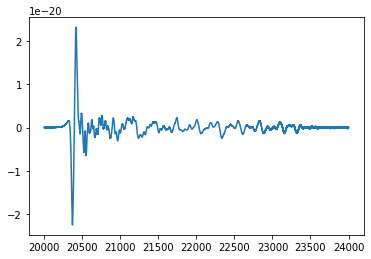

In [ ]:
plt.plot(ccsn_df['signal template'].loc[20000:24000])

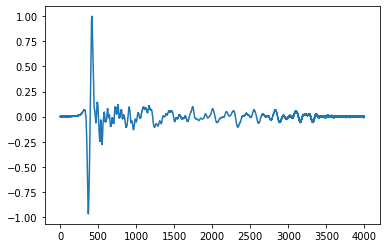

In [ ]:
signal_df = ccsn_df['signal template'].loc[20000:24000]
signal_df = signal_df/max(signal_df)
signal_df = signal_df.reset_index(drop = True)
plt.plot(signal_df)

##Detector Noise from Dimmelmeier

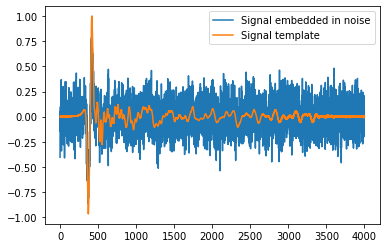

In [ ]:
torres_df = ccsn_df['signal + noise']/ccsn_df['signal + noise'].max()
torres_df = torres_df[20000:24000]
torres_df = torres_df.reset_index(drop = True)

plt.plot(torres_df, label ='Signal embedded in noise')
plt.plot(signal_df, label ='Signal template')
plt.legend()

In [ ]:
torres_clean_VS = pd.DataFrame(denoise_wavelet(torres_df, method = 'VisuShrink', mode ='soft', wavelet_levels = 6, wavelet = 'sym8', rescale_sigma = 'True'))
torres_clean_BS = pd.DataFrame(denoise_wavelet(torres_df, method = 'BayesShrink', mode ='soft', wavelet_levels = 3, wavelet = 'sym8', rescale_sigma = 'True'))

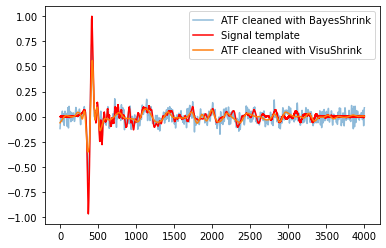

In [ ]:
plt.plot(torres_clean_BS, label ='ATF cleaned with BayesShrink', alpha = 0.5)
#plt.plot(torres_df.loc[20000:24000], label ='ATF noisy')
plt.plot(signal_df, label ='Signal template',color = 'r')
plt.plot(torres_clean_VS, label ='ATF cleaned with VisuShrink')
plt.legend()

In [ ]:
torres_clean_BS.shape


(4001,)

##Performance indices


In [ ]:
get_rmse(signal_df, torres_clean_VS)

ValueError: ignored

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:24000], torres_clean_BS.loc[20000:24000])

5.209656763059941e-21

In [ ]:
get_rmse(torres_clean_BS.loc[20000:24000], torres_clean_BS.loc[20000:24000])

0.0

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:24000],ccsn_df['signal + noise'].loc[20000:24000] )

5.202626197766541e-21

In [ ]:
get_rmse(ccsn_df['signal template'].loc[20000:24000],torres_clean_BS.loc[20000:24000] )

5.209656763059941e-21

#Test against Lopac 2020


### Table 1

In [ ]:
VS_sym5_6 = pd.DataFrame(denoise_wavelet(torres_df, method = 'VisuShrink', mode ='hard', wavelet_levels = 6, wavelet = 'sym5', rescale_sigma = 'True'))
print('RMSE: ',get_rmse(ccsn_df['signal template'].loc[20000:24000], VS_sym5_6.loc[20000:24000]))
print('MAE: ',mean_absolute_error(ccsn_df['signal template'].loc[20000:24000], VS_sym5_6.loc[20000:24000]))
print('MAX: ',max_error(ccsn_df['signal template'].loc[20000:24000], VS_sym5_6.loc[20000:24000]))

RMSE:  9.930403203322726e-22
MAE:  7.354281297643826e-22
MAX:  4.810389647378314e-21


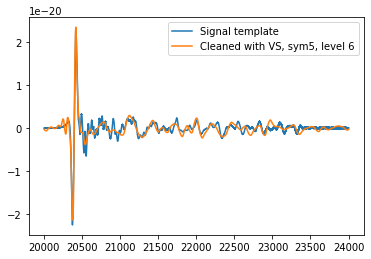

In [ ]:
plt.plot(ccsn_df['signal template'].loc[20000:24000], label ='Signal template')
plt.plot(VS_sym5_6.loc[20000:24000], label ='Cleaned with VS, sym5, level 6')
plt.legend()

In [ ]:
VS_db13_5 = pd.DataFrame(denoise_wavelet(torres_df, method = 'VisuShrink', mode ='hard', wavelet_levels = 5, wavelet = 'db13', rescale_sigma = 'True'))
print('RMSE: ',get_rmse(ccsn_df['signal template'].loc[20000:24000], VS_db13_5.loc[20000:24000]))
print('MAE: ',mean_absolute_error(ccsn_df['signal template'].loc[20000:24000], VS_sym5_6.loc[20000:24000]))
print('MAX: ',max_error(ccsn_df['signal template'].loc[20000:24000], VS_db13_5.loc[20000:24000]))

RMSE:  9.961747930393881e-22
MAE:  7.354281297643826e-22
MAX:  4.010748881738809e-21


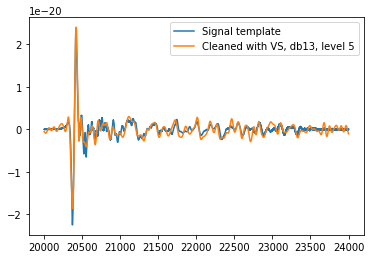

In [ ]:
plt.plot(ccsn_df['signal template'].loc[20000:24000], label ='Signal template')
plt.plot(VS_db13_5.loc[20000:24000], label ='Cleaned with VS, db13, level 5')
plt.legend()

In [ ]:
VS_coif1_7 = pd.DataFrame(denoise_wavelet(torres_df, method = 'VisuShrink', mode ='hard', wavelet_levels = 7, wavelet = 'coif1', rescale_sigma = 'True'))
print('RMSE: ',get_rmse(ccsn_df['signal template'].loc[20000:24000], VS_coif1_7.loc[20000:24000]))
print('MAE: ',mean_absolute_error(ccsn_df['signal template'].loc[20000:24000], VS_coif1_7.loc[20000:24000]))
print('MAX: ',max_error(ccsn_df['signal template'].loc[20000:24000], VS_coif1_7.loc[20000:24000]))

RMSE:  1.104511664389114e-21
MAE:  7.3768131771090875e-22
MAX:  1.1612378256789014e-20


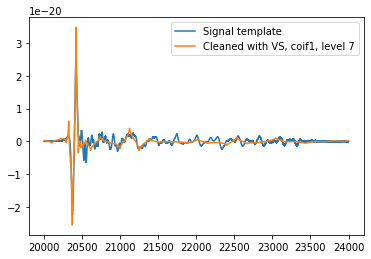

In [ ]:
plt.plot(ccsn_df['signal template'].loc[20000:24000], label ='Signal template')
plt.plot(VS_coif1_7.loc[20000:24000], label ='Cleaned with VS, coif1, level 7')
plt.legend()